In [75]:
#presets
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib import font_manager
import pandas as pd 

mpl.rcParams['figure.dpi'] = 200

plt.style.use('../src/my_style.mplstyle')

#space grotesk font, supports only latin.

font_dirs = ['fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Space Grotesk'
plt.rcParams['font.size'] = 10

In [76]:
#dataset used as example
df = pd.read_csv('selected_subjects.csv')
df

,selected_subject,count
0,Advanced Programming 1 (Java),21
1,Advanced programming 1(C#),8
2,Mobile Development,26
3,Python,61


In [77]:
#function for showing both value and percent
def func(pct, allvals):
    absolute = int(round(pct/100.0*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

In [78]:
#data
labels = df['selected_subject']
sizes = df['count']
colors = ['#ffa6c1', '#247ba0', '#f2545b', '#70a288']

#explode props
explode = [0.1 for i in range(len(df))]
explode[0] = 0
explode = tuple(explode)   

#bbox properties for labels
bbox_props = dict(boxstyle="square,pad=0.3", fc='#f7f4ea', ec=(0.133,0.133,0.133), lw=1)

In [79]:
def create_pie_bbox_legend():
    #pie creation
    patches, texts, autotexts = plt.pie(sizes, colors=colors,
                                       autopct=lambda pct: func(pct, sizes), startangle=90,
                                       rotatelabels=True, explode=explode, shadow=True,
                                       textprops={'fontsize': 12, 'bbox':bbox_props})
    
    #autotext props
    for autotext in autotexts:
        autotext.set_fontsize(10)
        autotext.set_color((0.133, 0.133, 0.133))

    #legend
    plt.legend(patches, labels,
          title="Subject",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

    plt.axis('equal')  


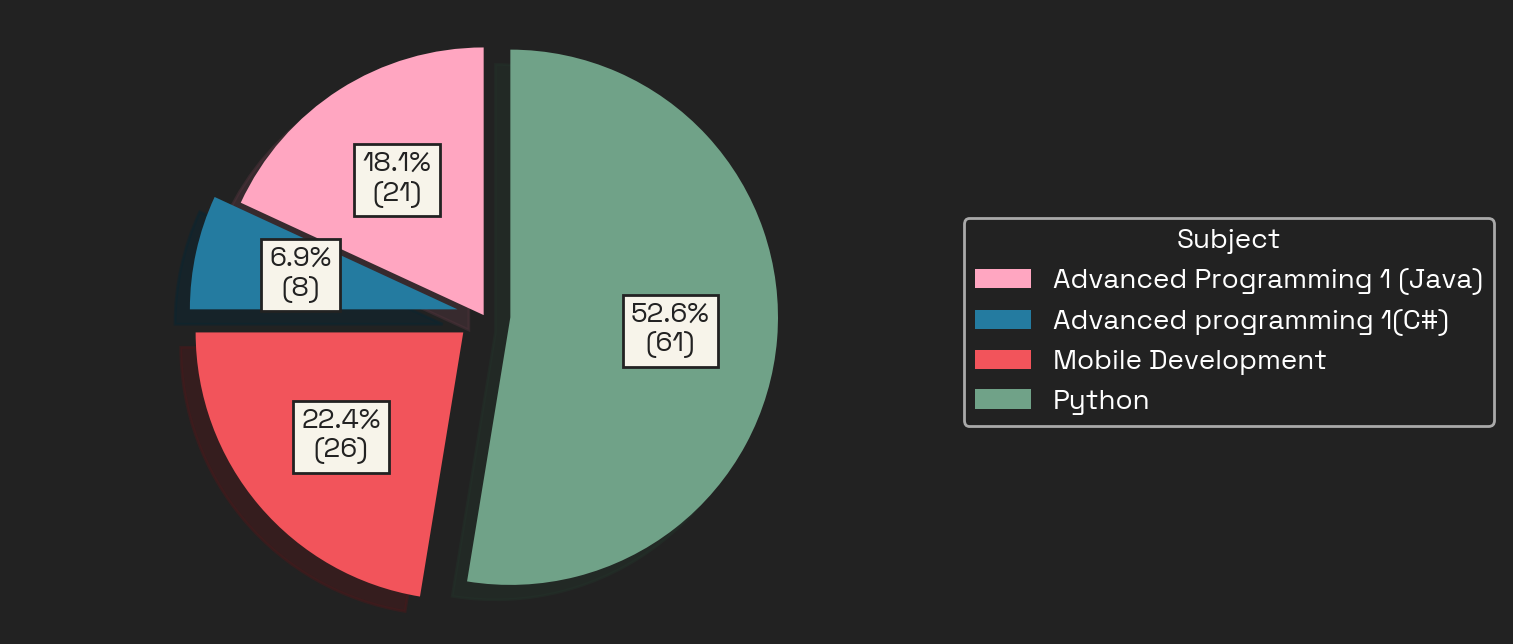

In [80]:
create_pie_bbox_legend()

In [95]:
def create_pie_rotated_legend():
    #pie creation
    patches, texts, autotexts = plt.pie(sizes, colors=colors,
                                       autopct=lambda pct: func(pct, sizes), startangle=90,
                                       rotatelabels=True, explode=explode, shadow=True,
                                       textprops={'fontsize': 12})
    
    #scaled + rotated autotexts
    for patch, autotext in zip(patches, autotexts):
        ang = (patch.theta2 + patch.theta1) / 2.
        ang2 = abs(patch.theta2 - patch.theta1)
        autotext.set_fontsize(30*np.sqrt(ang2/(360)))
        x = patch.r * 0.6 * np.cos(ang*np.pi/180)
        y = patch.r * 0.6 * np.sin(ang*np.pi/180)
        autotext.set_position((x, y))
        autotext.set_color((0, 0, 0))

    for label, autotext in zip(texts, autotexts):
        rot = label.get_rotation()
        autotext.set_rotation(rot+90+(1-rot//180)*180)
        label.set_rotation(0)
        
    plt.legend(patches, labels,
          title="Subject",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

    plt.axis('equal')  

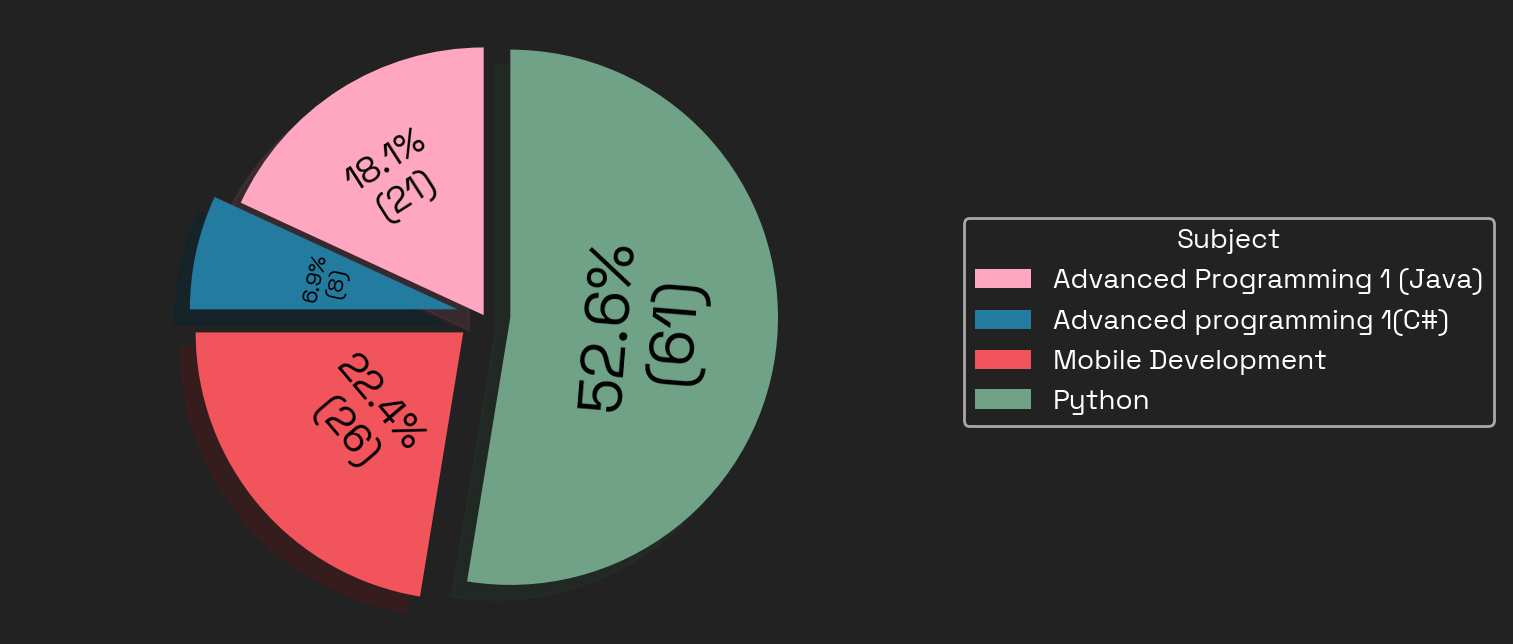

In [96]:
create_pie_rotated_legend()

In [105]:
def create_pie_arrows():
    #pie creation
    patches, texts, autotexts = plt.pie(sizes, colors=colors,
                                       autopct=lambda pct: func(pct, sizes), startangle=90,
                                       rotatelabels=True, explode=explode, shadow=True,
                                       textprops={'fontsize': 12, 'bbox':bbox_props})
    
    #autotext props
    for autotext in autotexts:
        autotext.set_fontsize(10)
        autotext.set_color((0.133, 0.133, 0.133))
        autotext.set_color((0, 0, 0))

    #bbox for labels 
    bbox_props2 = dict(boxstyle="square,pad=0.5", fc=(0.133,0.133,0.133), ec="w", lw=0.25)
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props2, zorder=0, va="center")

    #arrow creation
    for i, p in enumerate(patches):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        plt.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                    horizontalalignment=horizontalalignment,fontsize=10, **kw)

    plt.axis('equal')  


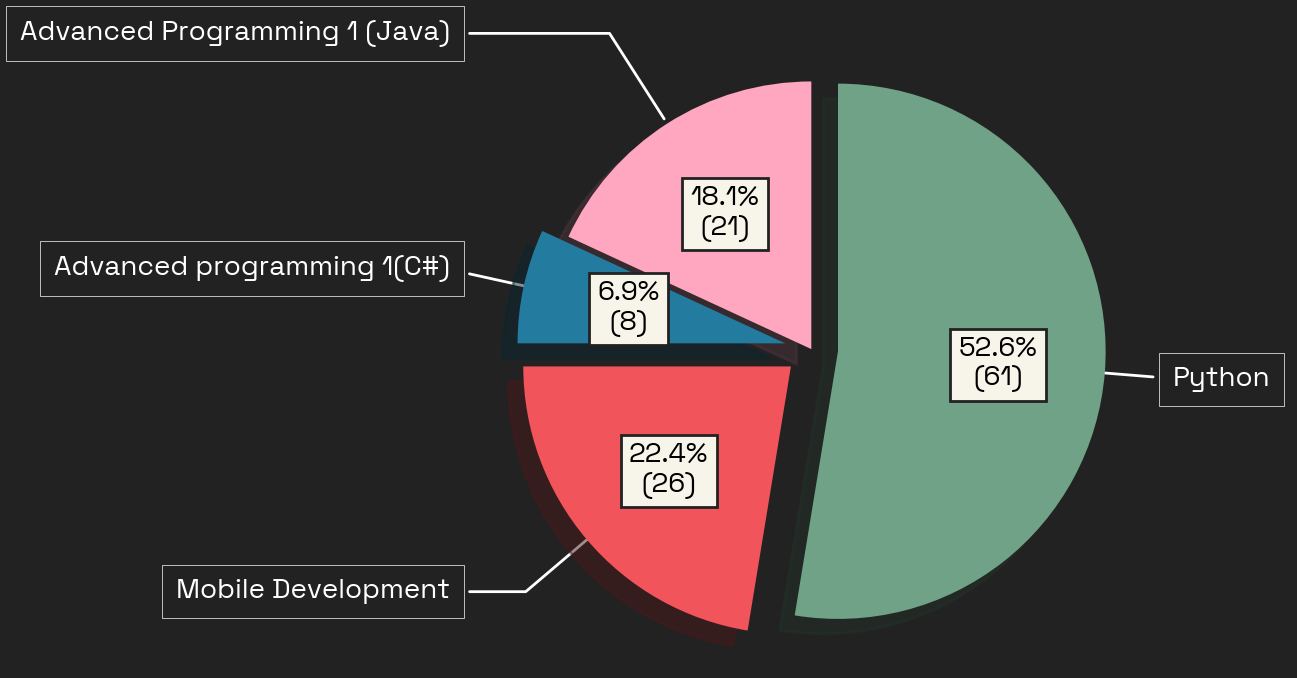

In [106]:
create_pie_arrows()